In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from sklearn.datasets import make_blobs
# Create dataset with 3 centers
X_, y_ = make_blobs(n_samples=300, centers=3, random_state=321)
X = pd.DataFrame(X_, columns=['x1','x2'])
X.head()

,x1,x2
0,7.793419,-7.149916
1,8.783409,-9.979164
2,7.467731,1.424818
3,9.204612,-5.804796
4,10.242530,-3.605225


In [3]:
from sklearn.cluster import KMeans
# Apply K-Means algorithm
kmeans = KMeans(n_clusters=3, n_init=10, random_state = 42)
kmeans.fit(X)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [4]:
# Making a dataframe copy of X for saving clusters 
df = X.copy()
df['cluster'] = kmeans.predict(X)
df.head()

,x1,x2,cluster
0,7.793419,-7.149916,1
1,8.783409,-9.979164,1
2,7.467731,1.424818,0
3,9.204612,-5.804796,2
4,10.242530,-3.605225,2


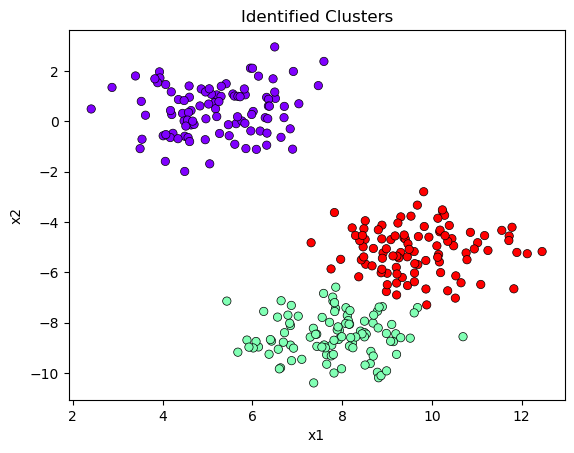

In [5]:
# Plot the data points and identified clusters
fig, ax = plt.subplots()
ax.scatter(df["x1"], df["x2"], c=df["cluster"], ec="black", lw=0.5, cmap="rainbow")
ax.set(xlabel="x1", ylabel="x2", title="Identified Clusters");

In [6]:
# Saving the cluster centers as a dataframe for visibility
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
cluster_centers

,x1,x2
0,5.218327,0.434833
1,7.809865,-8.512772
2,9.681187,-5.131638


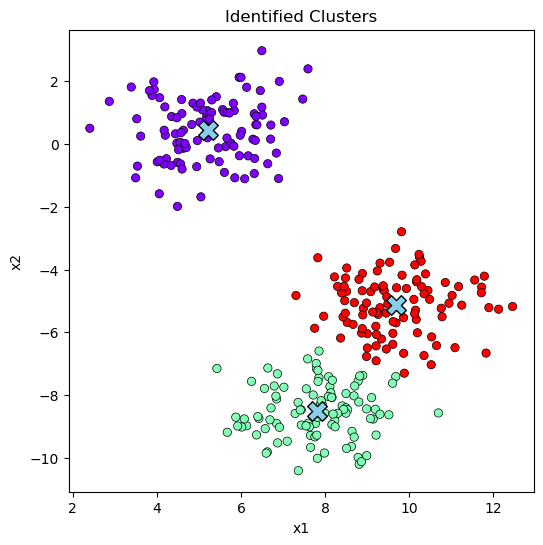

In [7]:
# Plot the data points and identified clusters
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(df["x1"], df["x2"], c=df["cluster"], ec="black", lw=0.5, cmap="rainbow")
ax.set(xlabel="x1", ylabel="x2", title="Identified Clusters")
# Plot the cluster centers
centers = ax.scatter(
    cluster_centers["x1"],
    cluster_centers["x2"],
    color="skyblue",
    ec="black",
    s=200,
    marker="X",
);

In [8]:
# Using scipy's cdist to calculate distances

from scipy.spatial.distance import cdist
# Calculate distance to each cluster center
distances = cdist(X, kmeans.cluster_centers_, 'euclidean')

In [9]:
# Distances shape is (# rows, # clusters)
distances.shape

(300, 3)

In [10]:
# Saving distances as a dataframe for convenience
cluter_cols = [f"Distance (Cluster {c})" for  c in range(len(kmeans.cluster_centers_))]
distance_df = pd.DataFrame(distances, columns = cluter_cols)
distance_df.head(3)

,Distance (Cluster 0),Distance (Cluster 1),Distance (Cluster 2)
0,8.009963,1.362955,2.763533
1,11.007322,1.760140,4.929960
2,2.457618,9.943477,6.920007


In [11]:
# Get the minimum distance to any cluster for each point
min_distances = np.min(distances, axis=1)
# Display first 5 values
min_distances[:5]

array([1.36295536, 1.76013984, 2.45761801, 0.82478221, 1.62635919])

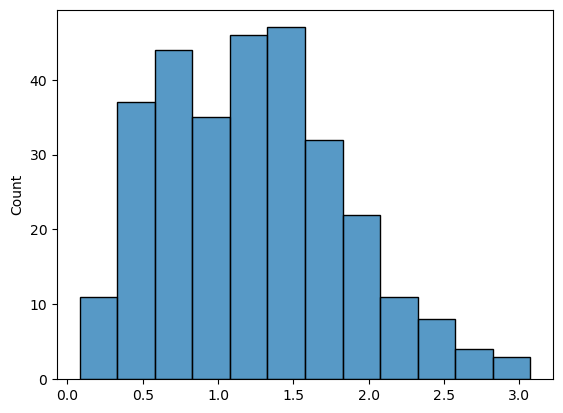

In [12]:
# distance from closet centroid
ax = sns.histplot(min_distances)

In [13]:
# Decide on a Threshold to Identify Anomalies

# Set a threshold based on a percentile
threshold = np.percentile(min_distances, 95)
threshold

2.299876112245027

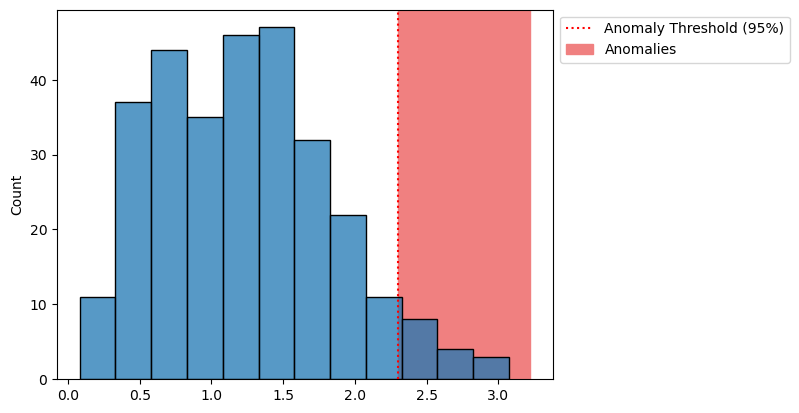

In [14]:
# Visualize the distribution of distances and the anomaly threshold.
ax = sns.histplot(min_distances)
ax.axvline(threshold, color='red', ls=':', label='Anomaly Threshold (95%)')
ax.axvspan(threshold, ax.get_xlim()[1], color='lightcoral',zorder=0, label='Anomalies')
ax.legend(bbox_to_anchor=[1,1]);

In [15]:
# Identify anomalies where the distance to closest cluster center is above the threshold
filter_anomalies = min_distances > threshold
# how many were found?
filter_anomalies.sum()

15

In [16]:
# Getting the row indices of the anomalies
idx_anomalies = X[filter_anomalies].index
idx_anomalies

Int64Index([2, 68, 87, 88, 94, 97, 105, 123, 161, 189, 200, 228, 244, 263,
            276],
           dtype='int64')

In [17]:
# Slicing the anomalies from X (for demonstration)
X.iloc[idx_anomalies]

,x1,x2
2,7.467731,1.424818
68,11.823414,-6.658463
87,9.814531,-2.796309
88,7.826284,-3.624850
94,5.429257,-7.147623
97,12.452401,-5.176033
105,10.690949,-8.563954
123,7.306840,-4.825578
161,6.495709,2.963979
189,12.122039,-5.262365


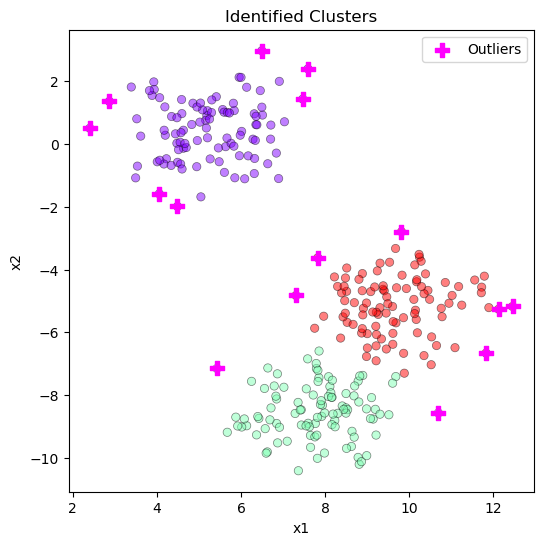

In [18]:
# Plot the data points and identified clusters
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(
    df["x1"], df["x2"], c=df["cluster"], ec="black", lw=0.5, cmap="rainbow", alpha=0.5
)
ax.set(xlabel="x1", ylabel="x2", title="Identified Clusters")
## Plotting the anomalies for visibility.
X.iloc[idx_anomalies].plot(
    x="x1", y="x2", kind="scatter", color="magenta", label="Outliers", ax=ax, marker='P',s=100,
);